In [1]:
from pprint import pprint

In [83]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('opinion_lexicon')
nltk.download('vader_lexicon')
from nltk.corpus import wordnet as wn  # to get the synsets
from nltk.corpus import stopwords  # common stop words in English
from nltk.tokenize import word_tokenize  # to tokenize the sentences
from nltk.wsd import lesk # fow word sense disambiguation
from nltk.sentiment.util import demo_liu_hu_lexicon
from nltk.sentiment.util import demo_vader_instance
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import opinion_lexicon
from nltk.tokenize import treebank
tokenizer = treebank.TreebankWordTokenizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
import pandas as pd

In [24]:
df = pd.read_csv("/content/dataset_sentiment_analysis.csv", header=None)
df.columns = ['id1', 'id2', 'timestamp', 'topic', 'author', 'text']
df

,id1,id2,timestamp,topic,author,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...,...,...,...
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [30]:
def remove_stop_words(tokens):
  """
  this function removes the stop words from the list of tokens
  """
  # Get the list of common stop words in English from WordNet
  stop_words = stopwords.words('english')
  tokens_filtered = []
  # Iterate through the list of tokens
  for token in tokens:
    # If the token is not a stop word, add it to the new list
    if token not in stop_words:
      tokens_filtered.append(token)
  return tokens_filtered

## Opinion lexicon

a list of positive and negative words

In [35]:
# Overview of opinion_lexicon
print("# Positive words:", len(opinion_lexicon.positive()))
print("# Negative words:", len(opinion_lexicon.negative()))

# Positive words: 2006
# Negative words: 4783


In [74]:
def get_sents(topic_to_analyse):
  sents = []
  for topic, text in zip(df.topic, df.text):
    if topic_to_analyse in topic:
      # print("\t", text)
      sents.append(text)
  return sents


def analyse_sentiment(topic_to_analyse):
  print("Analysing sentiment for topic: [%s]" % topic_to_analyse)
  print("-----------------------")
  get_sents(topic_to_analyse)
  print("-----------------------")
  print("TOT \tPOS \tNEG")
  print("-----------------------")
  total_pos, total_neg, total_neu = 0, 0, 0
  for sent in sents:
    # sent_filtered = remove_stop_words(word_tokenize(sent))
    sent_filtered = [word.lower() for word in tokenizer.tokenize(sent)]
    sent_filtered = remove_stop_words(sent_filtered) # this will reduce number of neutral words

    pos_count, neg_count = 0, 0
    for word in sent_filtered:
      if word in opinion_lexicon.positive():
        pos_count += 1
      elif word in opinion_lexicon.negative():
        neg_count += 1

    if pos_count > neg_count:
      sentiment = "POS"
      total_pos += 1
    elif neg_count > pos_count:
      sentiment = "NEG"
      total_neg += 1
    elif pos_count == neg_count:
      sentiment = "NEU"
      total_neu += 1

    print("%d \t%d \t%d \t%s" 
          % (len(sent_filtered), pos_count, neg_count, sentiment))
  
  print("-----------------------")
  print("# Sentences:", len(sents))
  print("# POS Sentences:", total_pos, total_pos/len(sents)*100)
  print("# NEG Sentences:", total_neg, total_neg/len(sents)*100)
  print("# NEU Sentences:", total_neu, total_neu/len(sents)*100)

In [75]:
analyse_sentiment('nike')

Analysing sentiment for topic: [nike]
-----------------------
-----------------------
TOT 	POS 	NEG
-----------------------
20 	0 	1 	NEG
12 	3 	0 	POS
30 	0 	4 	NEG
9 	1 	1 	NEU
7 	0 	0 	NEU
9 	0 	0 	NEU
4 	0 	2 	NEG
5 	0 	0 	NEU
19 	2 	1 	POS
7 	1 	0 	POS
4 	0 	1 	NEG
7 	0 	0 	NEU
8 	0 	1 	NEG
7 	0 	1 	NEG
6 	0 	1 	NEG
8 	0 	0 	NEU
9 	0 	0 	NEU
-----------------------
# Sentences: 17
# POS Sentences: 3 17.647058823529413
# NEG Sentences: 7 41.17647058823529
# NEU Sentences: 7 41.17647058823529


['Just bought my tickets for the 2010 FIFA World Cup in South Africa. Its '
 'going to be a great summer. http://bit.ly/9GEZI']
Positive


/usr/local/lib/python3.7/dist-packages/nltk/sentiment/util.py:319: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


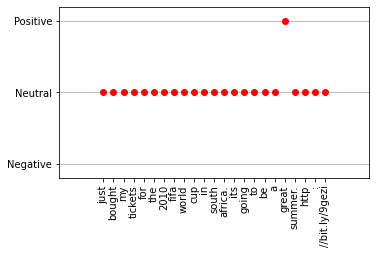

In [78]:
sent = get_sents('World Cup 2010'.lower())
pprint(sent)
demo_liu_hu_lexicon(sent[0], plot=True)

## Vader analyzer

VADER (Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.

For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

VADER's SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:
negative, neutral, positive, compound (computed by normalizing the scores above).

Refer: https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [86]:
sents = get_sents('dentist')
comp = 0
for sent in sents:
  pprint(sent)
  vader_analyzer = SentimentIntensityAnalyzer()
  values = vader_analyzer.polarity_scores(sent)
  pprint(values)
  comp += values['compound']
  print("------------")

print("Average compund value:", comp/len(sents))

('My wrist still hurts. I have to get it looked at. I HATE the '
 'dr/dentist/scary places. :( Time to watch Eagle eye. If you want to join, '
 'txt!')
{'compound': -0.8491, 'neg': 0.304, 'neu': 0.596, 'pos': 0.099}
------------
('Dentist tomorrow. Have to brush well in the morning. Like I make my hair all '
 'nice before I get it cut. Why?')
{'compound': 0.6486, 'neg': 0.082, 'neu': 0.627, 'pos': 0.29}
------------
('THE DENTIST LIED! " U WON\'T FEEL ANY DISCOMORT! PROB WON\'T EVEN NEED PAIN '
 'PILLS" MAN U TWIPPIN THIS SHIT HURT!! HOW MANY PILLS CAN I TAKE!!')
{'compound': -0.8429, 'neg': 0.332, 'neu': 0.585, 'pos': 0.083}
------------
"@kirstiealley my dentist is great but she's expensive...=("
{'compound': 0.3716, 'neg': 0.0, 'neu': 0.733, 'pos': 0.267}
------------
('@kirstiealley Pet Dentist '
 'http://www.funnyville.com/fv/pictures/dogdentures.shtml')
{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}
------------
'is studing math ;) tomorrow exam and dentist :)'
{'compound'